In [1]:
# import libraries and raw data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# based of a two-floor workplace/commerical building
BL_workplace = pd.read_csv("./source_data/building_load_nomissingdata.csv",index_col= 0)

# Calculate the 25th, average, and 75th of the annual power consumption for the workplace building at the 15-min resolution

In [ ]:
# workplace
# As the index of the loaded data from .csv would be str, the index would be needed to convert to datetime
BL_workplace.index = pd.to_datetime(BL_workplace.index)
# rename the index
BL_workplace = BL_workplace.rename_axis(index='Datetime')
# Group data by year and time interval, then calculate the mean
num_floor_workplace = 15
num_unit_per_floor_workplace = 1
BL_workplace_15min_power = BL_workplace.groupby([BL_workplace.index.year, BL_workplace.index.time])
BL_workplace_annual_avg = (BL_workplace.groupby([BL_workplace.index.year, BL_workplace.index.time])['total'].mean())*num_floor_workplace*num_unit_per_floor_workplace
BL_workplace_annual_25th = (BL_workplace.groupby([BL_workplace.index.year, BL_workplace.index.time])['total'].quantile(0.25))*num_floor_workplace*num_unit_per_floor_workplace
BL_workplace_annual_75th = (BL_workplace.groupby([BL_workplace.index.year, BL_workplace.index.time])['total'].quantile(0.75))*num_floor_workplace*num_unit_per_floor_workplace

# Output the result

In [197]:
BL_workplace_annual_avg.to_csv("./result/base_load/BL_workplace_annual_avg.csv")
BL_workplace_annual_25th.to_csv("./result/base_load/BL_workplace_annual_25th.csv")
BL_workplace_annual_75th.to_csv("./result/base_load/BL_workplace_annual_75th.csv")

# Visualize the result

In [58]:
def plot_workplace_base_load(df,Year,value_name,num_floor,num_unit_per_floor):
    """
    df: the base load data of every minute of multiple years, df
    Year: the year of data to plot, int
    value_name: the column name of the data to plot, str
    num_floor: the number of floors assumed in the workplace building, int
    num_unit_per_floor: the number of units assumed in each floor of the workplace building, int
    """
    # Resample data to get the annual average and 5% to 95% of the power range in a specific year
    df_avg = df.groupby([df.index.year, df.index.time])[value_name].mean()
    df_5th = df.groupby([df.index.year, df.index.time])[value_name].quantile(0.05)
    df_25th = df.groupby([df.index.year, df.index.time])[value_name].quantile(0.25)
    df_75th = df.groupby([df.index.year, df.index.time])[value_name].quantile(0.75)
    df_95th = df.groupby([df.index.year, df.index.time])[value_name].quantile(0.95)
    df_resampled = pd.concat([df_5th,df_25th,df_avg,df_75th,df_95th],axis=1)
    df_resampled.columns = ['5th_percentiles','25th_percentiles','avg','75th_percentiles','95th_percentiles']
    if Year == 2018:
        df_resampled = df_resampled[::2]
    df_resampled = df_resampled.loc[df_resampled.index.get_level_values(0) == Year]
    
    # Convert the index to datetime
    df_resampled.index = pd.to_datetime(df_resampled.index.map(lambda x: f"{x[0]} {x[1]}"))
    
    # Plotting
    plt.figure(figsize=(6, 4))

    # Plot the range (shaded area)
    alpha = num_floor * num_unit_per_floor # Assumed the homogeneous energy use at each unit
    plt.fill_between(df_resampled.index, df_resampled['5th_percentiles']*alpha, df_resampled['95th_percentiles']*alpha, color='lightblue', alpha=0.5, label='Power Range (5$^{th}$ to 95$^{th}$)')

    # Plot the annual average (line)
    plt.plot(df_resampled.index, df_resampled['avg']*alpha, color='blue', linewidth=2, label='Annual Average')
    plt.plot(df_resampled.index, df_resampled['25th_percentiles']*alpha, color='green', linewidth=2, label='25th')
    plt.plot(df_resampled.index, df_resampled['75th_percentiles']*alpha, color='red', linewidth=2, label='75th')

    # Set x-axis ticks to be at the hourly basis
    plt.xticks(ticks=[df_resampled.index[0],df_resampled.index[4*4+1],df_resampled.index[8*4+1],df_resampled.index[12*4+1],df_resampled.index[16*4+1],df_resampled.index[20*4+1]],labels=["0","4","8","12","16","20"])
    
    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Power (kW)')
    plt.title('Office building power load')

    # Add legend
    plt.legend(loc = 'upper left')
    
    # save figure
    plt.savefig(f"./result/base_load/BL_workplace_annual_avg_{Year}.svg",dpi=300)

    # Show the plot
    plt.show()

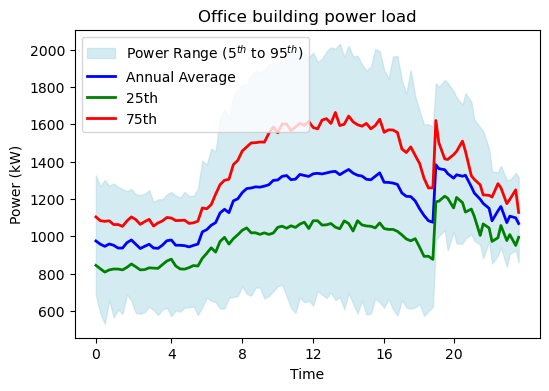

In [59]:
plot_workplace_base_load(df=BL_workplace,Year=2018,value_name='total',num_floor = 15, num_unit_per_floor = 1)

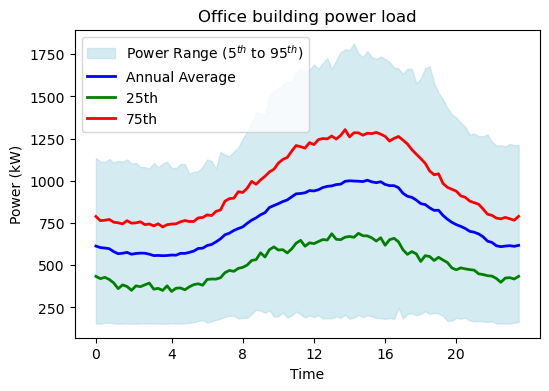

In [60]:
plot_workplace_base_load(df=BL_workplace,Year=2019,value_name='total',num_floor = 15, num_unit_per_floor = 1)

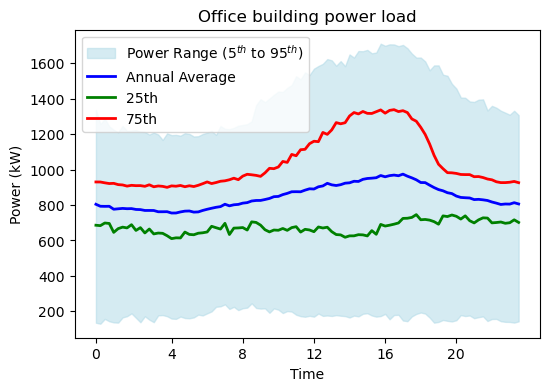

In [61]:
plot_workplace_base_load(df=BL_workplace,Year=2020,value_name='total',num_floor = 15, num_unit_per_floor = 1)